<a href="https://colab.research.google.com/github/YangHong92/ADML-RedHat/blob/colab_test/data_process/Data-Exploration-Nora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# load data from google drive

from google.colab import drive
drive.mount('/content/gdrive')
# 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [18]:
import glob
glob.glob('/content/gdrive/My Drive/colab/red_hat/dataset/*')

['/content/gdrive/My Drive/colab/red_hat/dataset/act_test.csv',
 '/content/gdrive/My Drive/colab/red_hat/dataset/people.csv',
 '/content/gdrive/My Drive/colab/red_hat/dataset/sample_submission.csv',
 '/content/gdrive/My Drive/colab/red_hat/dataset/act_train.csv']

In [0]:
train = pd.read_csv('../data/act_train.csv', parse_dates=['date'])
test = pd.read_csv('../data/act_test.csv', parse_dates=['date'])
people = pd.read_csv('../data/people.csv', parse_dates=['date'])

sel_col = [2, *np.arange(4,14)]
a = train.columns[sel_col]
b = ['act_' + train.columns[i] for i in sel_col]
mapping = dict(zip(a, b))

sel_col_ppl = np.arange(1,41)
a_ppl = people.columns[sel_col_ppl]
b_ppl = ['ppl_' + people.columns[i] for i in sel_col_ppl]
mapping_ppl = dict(zip(a_ppl, b_ppl))

train = train.rename(columns=mapping)
test = test.rename(columns=mapping)
people = people.rename(columns=mapping_ppl)


df_train = pd.merge(train, people, on='people_id')
df_test = pd.merge(test, people, on='people_id')


del train, test, people

In [0]:
df_train.head()

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,...,ppl_char_29,ppl_char_30,ppl_char_31,ppl_char_32,ppl_char_33,ppl_char_34,ppl_char_35,ppl_char_36,ppl_char_37,ppl_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


In [0]:
df_train.columns.to_series().groupby(df_train.dtypes).groups

{dtype('<M8[ns]'): Index(['act_date', 'ppl_date'], dtype='object'),
 dtype('bool'): Index(['ppl_char_10', 'ppl_char_11', 'ppl_char_12', 'ppl_char_13',
        'ppl_char_14', 'ppl_char_15', 'ppl_char_16', 'ppl_char_17',
        'ppl_char_18', 'ppl_char_19', 'ppl_char_20', 'ppl_char_21',
        'ppl_char_22', 'ppl_char_23', 'ppl_char_24', 'ppl_char_25',
        'ppl_char_26', 'ppl_char_27', 'ppl_char_28', 'ppl_char_29',
        'ppl_char_30', 'ppl_char_31', 'ppl_char_32', 'ppl_char_33',
        'ppl_char_34', 'ppl_char_35', 'ppl_char_36', 'ppl_char_37'],
       dtype='object'),
 dtype('int64'): Index(['outcome', 'ppl_char_38'], dtype='object'),
 dtype('O'): Index(['people_id', 'activity_id', 'activity_category', 'act_char_1',
        'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6',
        'act_char_7', 'act_char_8', 'act_char_9', 'act_char_10', 'ppl_char_1',
        'ppl_group_1', 'ppl_char_2', 'ppl_char_3', 'ppl_char_4', 'ppl_char_5',
        'ppl_char_6', 'ppl_ch

In [0]:
for d in ['act_date', 'ppl_date']:
    print('Start of ' + d + ': ' + str(df_train[d].min().date()))
    print('  End of ' + d + ': ' + str(df_train[d].max().date()))
    print('Range of ' + d + ': ' + str(df_train[d].max() - df_train[d].min()) + '\n')

Start of act_date: 2022-07-17
  End of act_date: 2023-08-31
Range of act_date: 410 days 00:00:00

Start of ppl_date: 2020-05-18
  End of ppl_date: 2023-08-31
Range of ppl_date: 1200 days 00:00:00



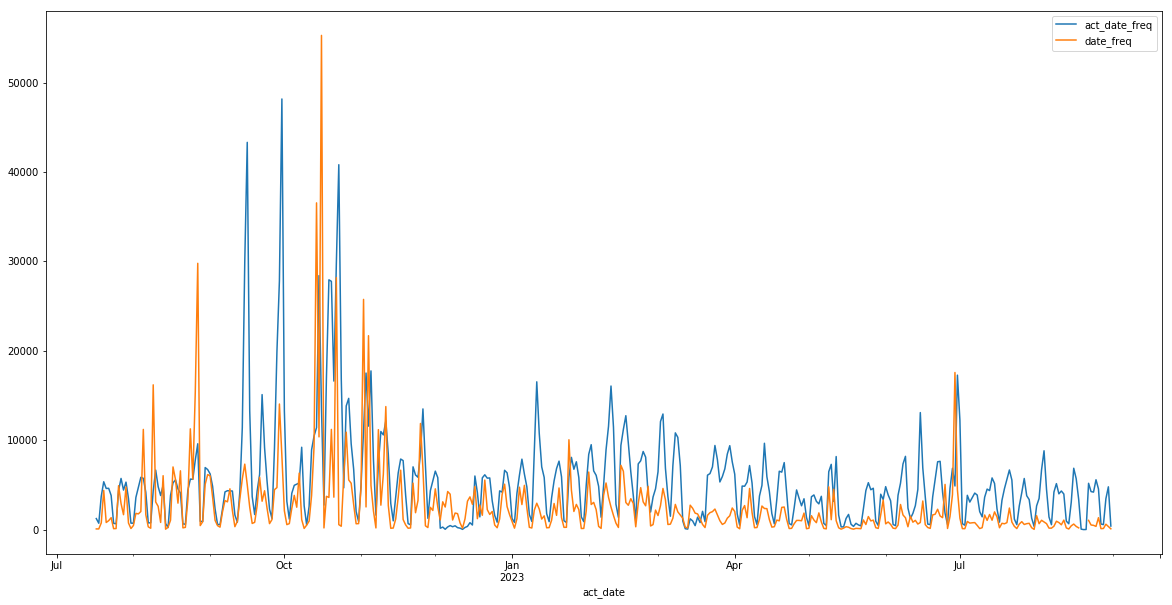

In [0]:
date = pd.DataFrame()
date['act_date_freq'] = df_train.groupby('act_date')['outcome'].count()
date['date_freq'] = df_train.groupby('ppl_date')['outcome'].count()
date.plot(figsize=(20, 10))

In [0]:
max_date = df_train['ppl_date'].max().date() #Datetime
min_date = df_train['ppl_date'].min() #pandas.Timestamp
val = pd.to_datetime(df_train['ppl_date'].values[0]) #pandas.Timestamp
val_ = df_train['ppl_date'].values[0] #numpy.datetime64

delta = pd.to_datetime(df_train['ppl_date'].values)-min_date
print(delta.days)

# print(type(max_date), type(min_date), type(val), type(val_), type(delta))
# print(val-min_date, pd.to_timedelta([delta]).astype('timedelta64[h]')[0])

Int64Index([407, 407, 407, 407, 407, 407, 233, 233, 753, 753,
            ...
            963, 963, 963, 963, 963, 963, 963, 963, 963, 963],
           dtype='int64', length=2197291)


### Convert Timestamp column to day_difference from min_date

In [0]:
df_train_10000 = df_train[0:10000]

df_train_10000['ppl_date'] = (pd.to_datetime(df_train_10000['ppl_date'].values)-min_date).days
df_train_10000['act_date'] = (pd.to_datetime(df_train_10000['act_date'].values)-min_date).days
df_train_10000.head()

/Users/yanghong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yanghong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,...,ppl_char_29,ppl_char_30,ppl_char_31,ppl_char_32,ppl_char_33,ppl_char_34,ppl_char_35,ppl_char_36,ppl_char_37,ppl_char_38
0,ppl_100,act2_1734928,1195,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,862,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,862,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,1173,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,1195,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


### Convert Bool column to 1/0

In [0]:
to_replace_bool_col = ['ppl_char_10', 'ppl_char_11', 'ppl_char_12', 'ppl_char_13',
        'ppl_char_14', 'ppl_char_15', 'ppl_char_16', 'ppl_char_17',
        'ppl_char_18', 'ppl_char_19', 'ppl_char_20', 'ppl_char_21',
        'ppl_char_22', 'ppl_char_23', 'ppl_char_24', 'ppl_char_25',
        'ppl_char_26', 'ppl_char_27', 'ppl_char_28', 'ppl_char_29',
        'ppl_char_30', 'ppl_char_31', 'ppl_char_32', 'ppl_char_33',
        'ppl_char_34', 'ppl_char_35', 'ppl_char_36', 'ppl_char_37']

df_train_10000[to_replace_bool_col] = df_train_10000[to_replace_bool_col].astype(int)
df_train_10000.head()

/Users/yanghong/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,...,ppl_char_29,ppl_char_30,ppl_char_31,ppl_char_32,ppl_char_33,ppl_char_34,ppl_char_35,ppl_char_36,ppl_char_37,ppl_char_38
0,ppl_100,act2_1734928,1195,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,0,1,1,1,0,36
1,ppl_100,act2_2434093,862,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,0,1,1,1,0,36
2,ppl_100,act2_3404049,862,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,0,1,1,1,0,36
3,ppl_100,act2_3651215,1173,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,0,1,1,1,0,36
4,ppl_100,act2_4109017,1195,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,0,1,1,1,0,36


### Convert Object column using one-hot encoding

In [0]:
to_convert_obj_col = ['activity_category', 'act_char_1',
        'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6',
        'act_char_7', 'act_char_8', 'act_char_9', 'act_char_10', 'ppl_char_1',
        'ppl_group_1', 'ppl_char_2', 'ppl_char_3', 'ppl_char_4', 'ppl_char_5',
        'ppl_char_6', 'ppl_char_7', 'ppl_char_8', 'ppl_char_9']

for col in to_convert_obj_col:
    col_type_count = df_train_10000[col].value_counts().sort_index()
    print(col,": =============== \n", col_type_count, "\n")


activity_category : =============== 
 type 1     818
type 2    4255
type 3    1140
type 4    1115
type 5    2640
type 6      16
type 7      16
Name: activity_category, dtype: int64 

act_char_1 : =============== 
 type 1      83
type 10     40
type 11      9
type 12     78
type 13      7
type 14      2
type 15      7
type 16      6
type 17     12
type 19      1
type 2     225
type 20      4
type 22      1
type 23     11
type 24      2
type 25      3
type 26     13
type 28      2
type 29      9
type 3      81
type 30      5
type 35      2
type 36      4
type 4       3
type 40      2
type 41      1
type 5     145
type 6       3
type 7      39
type 8      15
type 9       3
Name: act_char_1, dtype: int64 

act_char_2 : =============== 
 type 1     117
type 10     28
type 11      2
type 12     16
type 13      6
type 14      7
type 15      2
type 16     52
type 17      3
type 18      1
type 19      9
type 2     283
type 20      2
type 21      1
type 25      1
type 26      1
type 29      1
ty

In [0]:
# get_one_hot_expression
df_train_10000_one_hot = pd.get_dummies(df_train_10000, columns = to_convert_obj_col)

df_train_10000_one_hot.head()

,people_id,activity_id,act_date,outcome,ppl_date,ppl_char_10,ppl_char_11,ppl_char_12,ppl_char_13,ppl_char_14,...,ppl_char_8_type 8,ppl_char_9_type 1,ppl_char_9_type 2,ppl_char_9_type 3,ppl_char_9_type 4,ppl_char_9_type 5,ppl_char_9_type 6,ppl_char_9_type 7,ppl_char_9_type 8,ppl_char_9_type 9
0,ppl_100,act2_1734928,1195,0,407,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,ppl_100,act2_2434093,862,0,407,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,ppl_100,act2_3404049,862,0,407,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
3,ppl_100,act2_3651215,1173,0,407,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,ppl_100,act2_4109017,1195,0,407,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [0]:
df_train_10000_one_hot.to_csv('../data/result/dataset_process_nora.csv')

### Summarize statistics Information of Integer column

In [0]:
to_analyze_col = 'ppl_char_38'
mean = np.mean(df_train_10000[to_analyze_col])
median = np.median(df_train_10000[to_analyze_col])
corrcoef = np.corrcoef(df_train_10000[to_analyze_col], df_train_10000['outcome'])
std = np.std(df_train_10000[to_analyze_col])

In [0]:
print(mean, "\n", median, "\n", corrcoef, "\n", std)

56.0087 
 65.0 
 [[1.         0.59357611]
 [0.59357611 1.        ]] 
 35.259353713730604


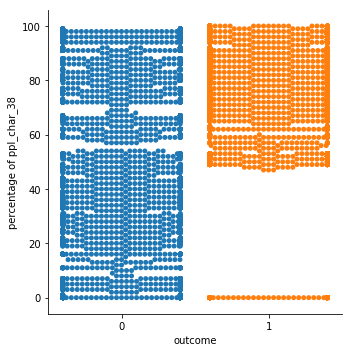

In [0]:
import seaborn as sns
sns.catplot(x='outcome', y='ppl_char_38', kind="swarm", data=df_train_10000)
# sns.swarmplot(x=df_train_10000['outcome'], y=df_train_10000[to_analyze_col])
plt.xlabel('outcome')
plt.ylabel('percentage of ppl_char_38')
plt.show()

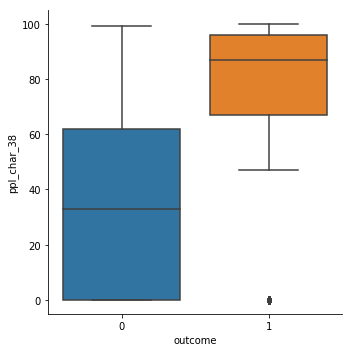

In [0]:
sns.catplot(x='outcome', y='ppl_char_38', kind="box", data=df_train_10000)